<a href="https://colab.research.google.com/github/urness/CS167Fall22Code/blob/main/Day19_Perceptron%26SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 19 Notes (Fall 2022)

Perceptron and SGD

In [ ]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/irisData.csv')

In [ ]:
#create dummy variables for species in Iris data
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
iris_dummies.head()

In [ ]:
### use a Perceptron to predict if an iris is a Setosa

import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics


#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")

# get "dummy" variables for species
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
#target = "species_Iris-virginica"
#target = "species_Iris-setosa"
target = "species_Iris-versicolor"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
iris_perc_predictions = perc.predict(test_data)

#output accuracy
print("Setosa accuracy:", metrics.accuracy_score(test_sln, iris_perc_predictions))

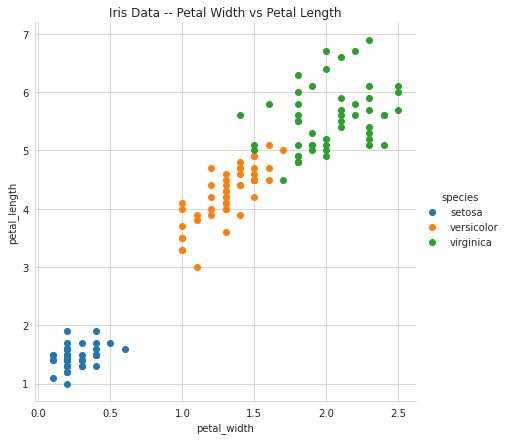

In [7]:
#let's take a look at the data:
import seaborn as sns
import matplotlib.pyplot as plt
 
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
 
# use seaborn to create a scatterplot
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'petal_width',
                              'petal_length').add_legend().set(title='Iris Data -- Petal Width vs Petal Length')


# In class Exercise 1:
- Given the example for species_Iris-versicolor, how does Perceptron do for:
  - species_Iris-virginica
  - species_Iris-setosa
- Do you expect these to also give 100% accuracy? Why or why not?

# Boston Housing Dataset:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

In [ ]:
#Boston Housing Data

from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas
data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/HousingData.csv') 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


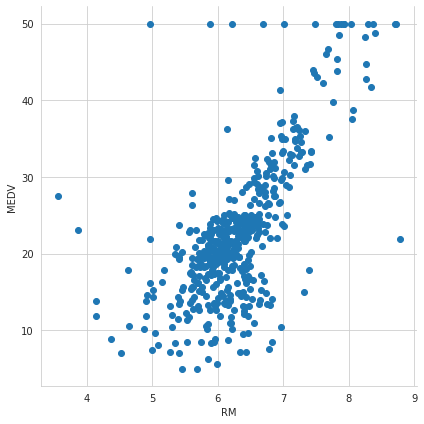

In [ ]:
## Play around with plotting different predictor variables
import seaborn as sns
import matplotlib.pyplot as plt
data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/HousingData.csv') 

sns.set_style("whitegrid")
sns.FacetGrid(data,height = 6).map(plt.scatter,'RM','MEDV')

# In-class Exercise 2:
- Find a Gradient Descent Algorithm on scikit-learn
  - Hint: Stochastic Gradient Descent (SGD)
- Apply it to the Boston Housing Market Dataset
- Utilize a metric to determine how well the algorithm is doing
- Consider reading the user's guide if the results don't make sense
- Can you plot the results of the MSE v Epochs?

In [ ]:
# Code using SGD on Boston Housing Dataset:
#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDRegressor

# load data
housing_data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/HousingData.csv')
# clean the data
housing_data['CRIM'].fillna(housing_data['CRIM'].mean(),inplace=True)
housing_data['ZN'].fillna(housing_data['ZN'].mean(),inplace=True)
housing_data['INDUS'].fillna(housing_data['INDUS'].mean(),inplace=True)
housing_data['CHAS'].fillna(housing_data['CHAS'].mean(),inplace=True)
housing_data['AGE'].fillna(housing_data['AGE'].mean(),inplace=True)
housing_data['LSTAT'].fillna(housing_data['LSTAT'].mean(),inplace=True)

# Split the data into the training data and testing data
target= 'MEDV'
predictors = housing_data.columns.drop(target) # use all of the columns except for MEDV
train_data, test_data, train_sln, test_sln = train_test_split(housing_data[predictors], housing_data[target], test_size = 0.2, random_state=41)

#load up scikit-learn SGDregressor
sgd = SGDRegressor()
sgd.fit(train_data,train_sln)
medv_sgd_predictions = sgd.predict(test_data)

#output accuracy
print("SGD Regression R2:", metrics.r2_score(test_sln, medv_sgd_predictions))
print("SGD Regression MAE:", metrics.mean_absolute_error(test_sln, medv_sgd_predictions))
print("SGD Regression MSE:", metrics.mean_squared_error(test_sln, medv_sgd_predictions))


SGD Regression R2: -2.0997482555461684e+26
SGD Regression MAE: 89282068786826.02
SGD Regression MSE: 9.749324898898145e+27


Whoa. that's pretty bad. What's going on here?
[Stochastic Gradient Descent documentation](https://scikit-learn.org/stable/modules/sgd.html#)